## D Vamsidhar - 24070149005
### RL Lab - Policy Iteration Algorithm

In [37]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_values, test_agent
import warnings

warnings.filterwarnings('ignore')



In [38]:
env = Maze()

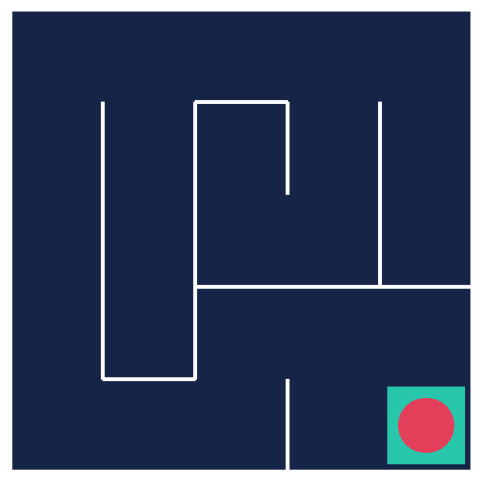

In [39]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [40]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Action space: {env.action_space.n}")

Observation space shape: [5 5]
Action space: 4


In [41]:
policy_prob = np.full((5, 5, 4), 0.25)

def policy(state):
    return policy_prob[state]

In [42]:
action_probabilities = policy((0, 0))

for action, prob in zip(range(4), action_probabilities):
    print(f"probabilities of taking action {action}: {prob}")

probabilities of taking action 0: 0.25
probabilities of taking action 1: 0.25
probabilities of taking action 2: 0.25
probabilities of taking action 3: 0.25


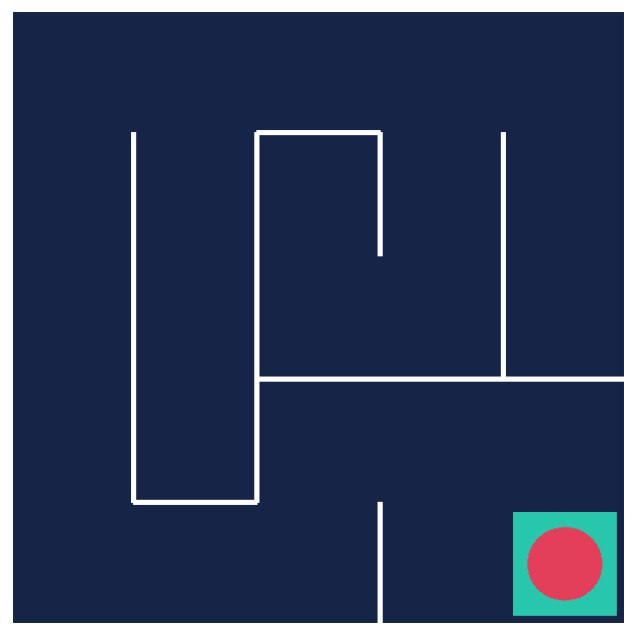

In [43]:
test_agent(env, policy, episodes=1)

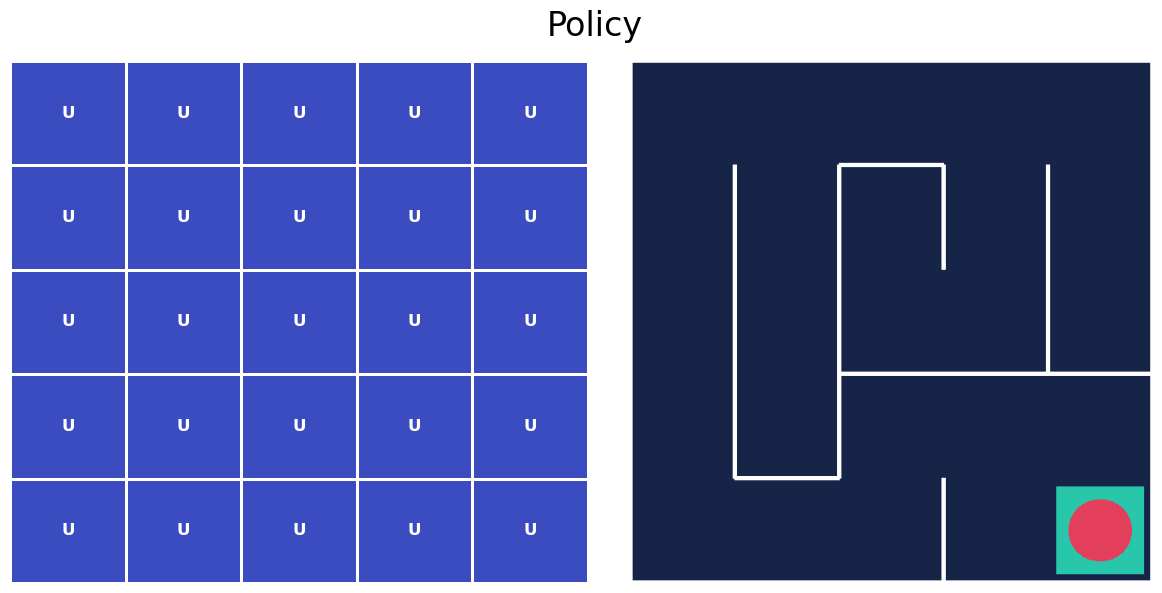

In [44]:
plot_policy(policy_prob, frame)

In [45]:
state_value = np.zeros(shape=(5, 5))

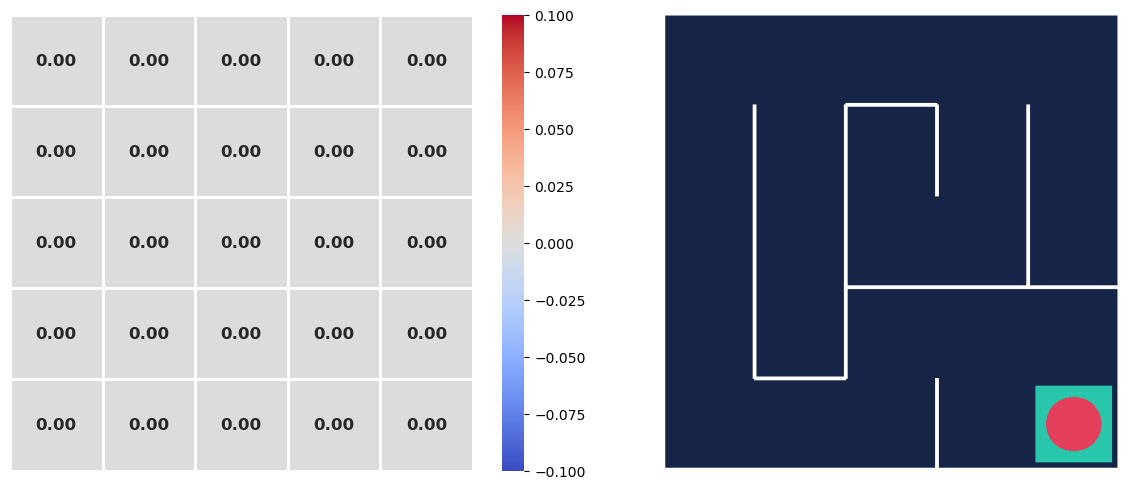

In [46]:
plot_values(state_value, frame)

In [47]:
def policy_evaluation(policy_prob, state_value, theta=1e-6, gamma=0.99):
    delta = float("inf")

    while delta > theta:
        delta = 0

        for row in range(5):
            for col in range(5):
                old_value = state_value[(row, col)]
                new_value = 0
                action_probabilities = policy_prob[(row, col)]


                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    new_value += prob * (reward + gamma * state_value[next_state])

                state_value[(row, col)] = new_value

                delta = max(delta, abs(old_value - new_value))

In [48]:
def policy_improvement(policy_prob, state_value, gamma=0.99):

    policy_stable = True
    for row in range(5):
        for col in range(5):
            old_action = policy_prob[(row, col)].argmax()

            new_action = None
            max_qsa = float("-inf")

            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row, col), action)
                qsa = reward + gamma * state_value[next_state]
                if qsa > max_qsa:
                    max_qsa = qsa
                    new_action = action

            action_probs = np.zeros(4)
            action_probs[new_action] = 1
            policy_prob[(row, col)] = action_probs

            if new_action != old_action:
                policy_stable = False

        return policy_stable

In [49]:
def policy_iteration(policy_prob, state_value, theta=1e-6, gamma=0.99):
    policy_stable = False

    while not policy_stable:
        policy_evaluation(policy_prob, state_value, theta, gamma)

        policy_stable = policy_improvement(policy_prob, state_value, gamma)

In [50]:
policy_iteration(policy_prob, state_value)

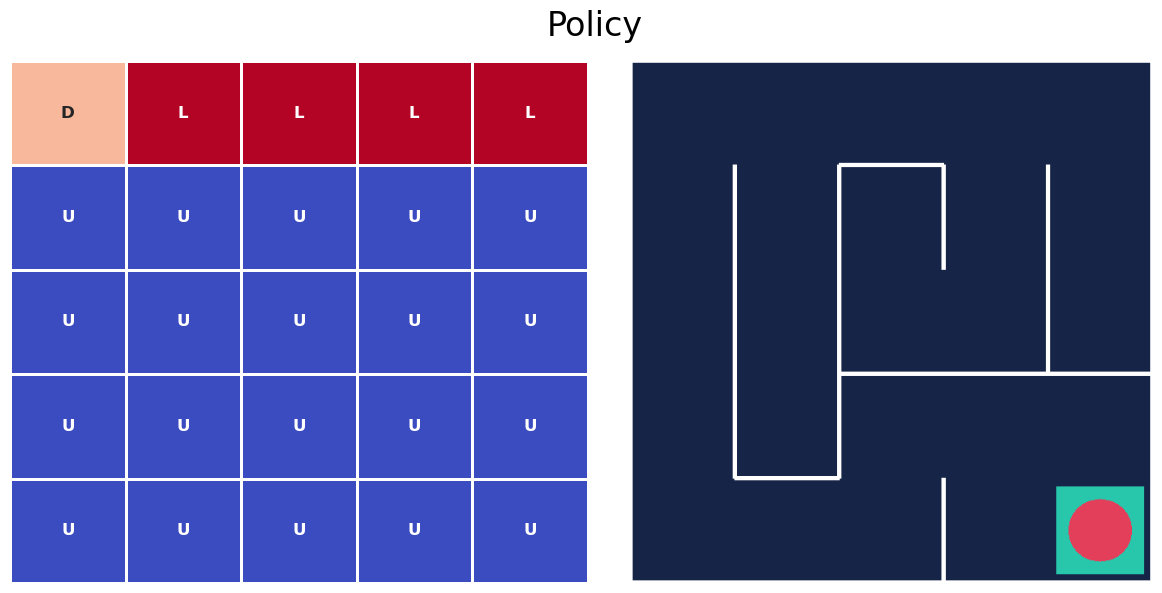

In [51]:
plot_policy(policy_prob, frame)

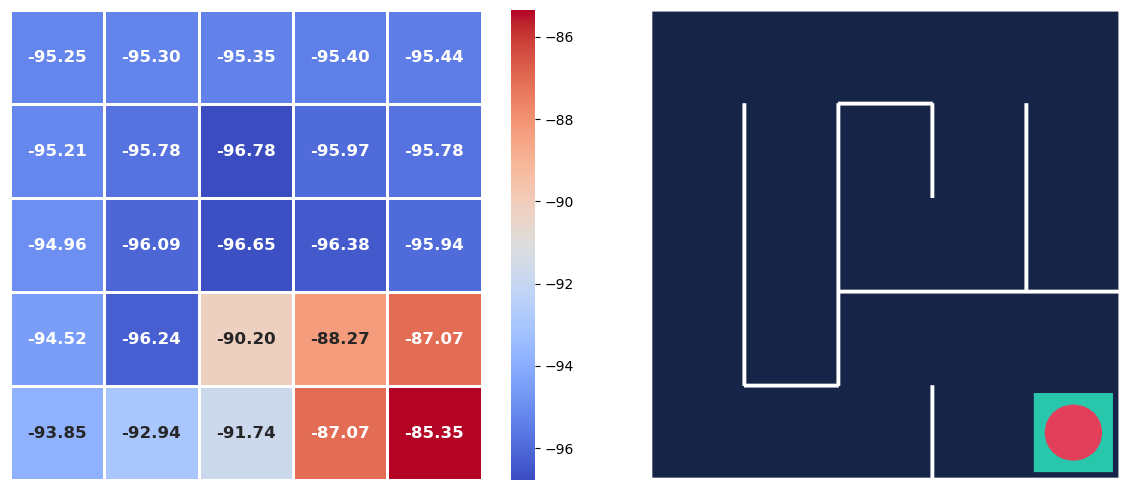

In [52]:
plot_values(state_value, frame)

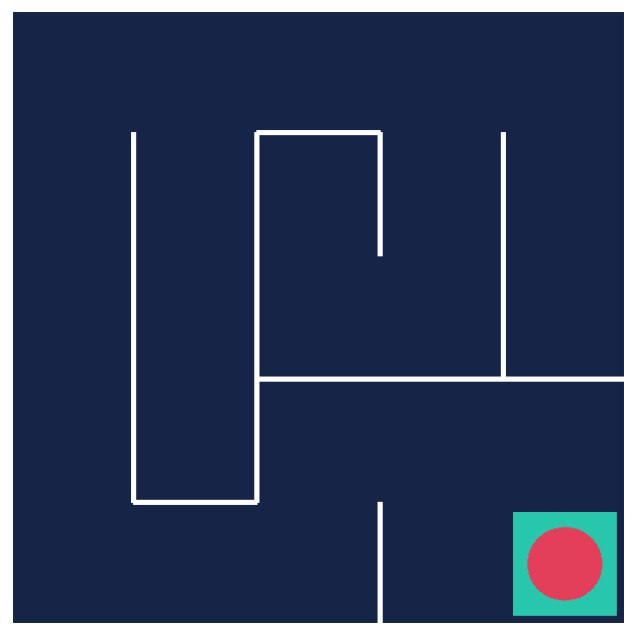

In [53]:
test_agent(env, policy, episodes=1)